Lecture: AI I - Advanced 

Previous:
[**Chapter 0: Prerequisites**](../00_prerequisites/REWADME.md)

---

# Chapter 1.1: Neuron

- [Artificial Neuron](#artificial-neuron)
- [Activation Functions](#activation-functions)
- [Multi Layer Perceptron](#multi-layer-perceptron)
- [Loss & Gradient Descent & Backpropagation](#loss-gradient-descent-backpropagation)
- [Tasks](#tasks)


**Artificial Neural Networks (ANNs)** represent a fundamental paradigm shift in machine learning: instead of manually engineering features and designing rules, we build systems that learn representations directly from data. Inspired by the structure of biological brains—though the analogy should not be taken too literally—ANNs consist of interconnected computational units called neurons that process information through weighted connections. What makes neural networks particularly powerful is their ability to automatically discover hierarchical patterns: lower layers might detect simple features (like edges in images), while deeper layers combine these into increasingly abstract concepts (like textures, parts, and eventually entire objects). This automatic feature learning distinguishes deep learning from classical machine learning methods like SVMs or Random Forests, which require domain experts to design appropriate features manually. Since the 2010s, ANNs have achieved breakthrough performance in tasks ranging from image recognition and natural language processing to game playing and scientific discovery—largely enabled by three factors: massive datasets, powerful GPU hardware, and algorithmic innovations in training deep networks.

The fundamental building block of any neural network is the **artificial neuron**, which we'll explore in detail below.

## Artificial Neuron

![neuron](data/01_basics/neuron.png)

This diagram illustrates the three fundamental operations of an artificial neuron, which execute sequentially from left to right:

### 1. Transfer Function (Aggregation)

The neuron receives multiple input signals $x_1, x_2, x_3, \ldots, x_n$​. Each input is connected to a weight $W_i$​ that determines the importance of that input. Large weights amplify a signal, while small weights dampen it.

The **Transfer Function** computes the weighted sum of all inputs plus a bias term $b$:

$$z=\sum_{i=1}^n W_i \cdot x_i + b = W_1 x_1 + W_2 x_2 + \cdots + W_n x_n + b$$

This is a linear transformation that combines all input information into a single scalar $z$. The bias allows the neuron to shift the decision boundary.

### 2. Activation Function (Non-Linearity)

The **Activation Function $f(\cdot)$** applies a non-linear transformation to $z$:

$$a = f(z)$$

**Why is this necessary?** Without an activation function, even a deep network would be just a composition of linear operations – therefore still linear. Only non-linearity enables neural networks to learn complex patterns.

Common activation functions:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh

### 3. Output Function

The Output Function produces the final output signal $y$. In most cases, this is simply the identity function:

$$y = g(a) = a$$

where the output directly equals the activation. However, in special cases (e.g., multi-class classification), an additional transformation like Softmax may be applied here.

### In Summary: The Complete Forward Pass

$$y = g(f(\sum_{i=1}^n W_i \cdot x_i + b))$$

where $g(\cdot)$ is typically the identity function $g(a)=a$, simplifying to:

$$y = f(\sum_{i=1}^n W_i \cdot x_i + b)$$

**In words**: The neuron multiplies each input by its weight, sums them all up (plus bias), applies an activation function, applies an output function (usually identity), and outputs the result.

**During training**, the weights $W_i$ and bias $b$ are adjusted via backpropagation to minimize the loss. The inputs $x_i$ and the activation function $f$ remain fixed.

## Activation Functions

Now that we understand the structure of a neuron, you might have noticed that we mentioned several activation functions — **Sigmoid, ReLU, Tanh, Softmax** — but didn't explain when to use which one or why these specific functions exist. This choice is far from arbitrary. The activation function fundamentally determines:

* How well your network can learn (gradient flow during backpropagation)
* How fast it trains (computational efficiency)
* What problems it can solve (expressiveness and output constraints)

Choosing the wrong activation function can mean the difference between a model that trains in hours versus one that never converges at all. In the next section, we'll explore the most important activation functions in detail, understand their mathematical properties, and learn exactly when to use each one in hidden layers versus output layers.

### Why Do We Need Activation Functions?

Without activation functions, a neural network would be nothing more than a series of linear transformations. Consider a two-layer network without activations:

$$y=W_2​(W_1​x+b_1​)+b_2​=(W_2​W_1​)x+(W_2​b_1​+b_2​)=W^′x+b^′$$

No matter how many layers we stack, the result is still just a linear function! This means the network could only learn linear decision boundaries—no better than simple linear regression. Activation functions introduce non-linearity, enabling networks to approximate arbitrarily complex functions (Universal Approximation Theorem).

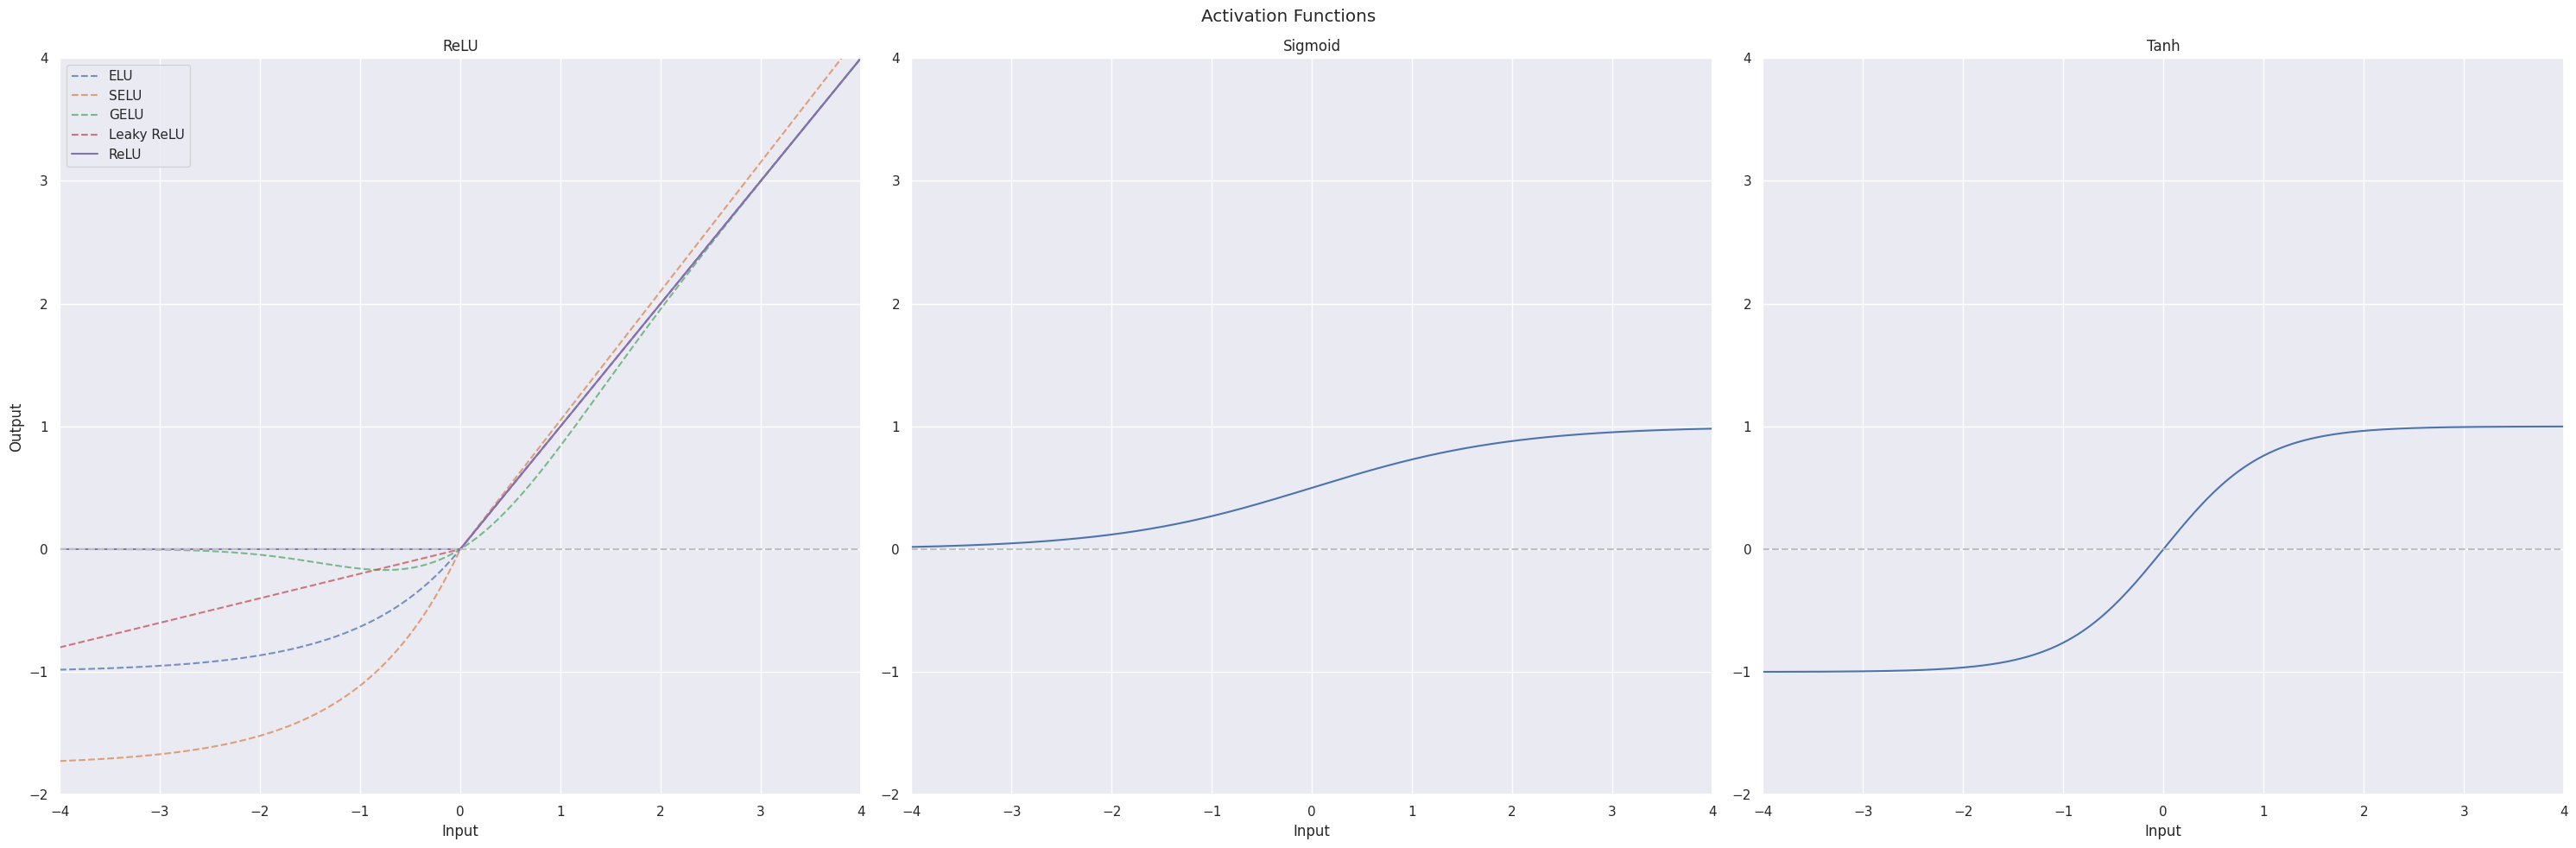

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from torch.functional import F

input = torch.from_numpy(np.linspace(-4, 4, 1_000))


sns.set_theme(style="darkgrid")
fig, (relu_ax, sigmoid_ax, tanh_ax) = plt.subplots(1, 3, figsize=(30, 10))
relu_ax.plot(input, F.elu(input), label="ELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.selu(input), label="SELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.gelu(input), label="GELU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.leaky_relu(input, 0.2), label="Leaky ReLU", alpha=0.75, linestyle="--")
relu_ax.plot(input, F.relu(input), label="ReLU")
relu_ax.axhline(0, color="0.75", linestyle="--")
relu_ax.set(ylabel='Output', xlabel='Input', title="ReLU", xlim=(-4, 4), ylim=(-2, 4))

sigmoid_ax.plot(input, F.sigmoid(input), label="Sigmoid")
sigmoid_ax.axhline(0, color="0.75", linestyle="--")
sigmoid_ax.set(xlabel='Input', title="Sigmoid", xlim=(-4, 4), ylim=(-2, 4))

tanh_ax.plot(input, F.tanh(input), label="Tanh")
tanh_ax.axhline(0, color="0.75", linestyle="--")
tanh_ax.set(xlabel='Input', title="Tanh", xlim=(-4, 4), ylim=(-2, 4))

relu_ax.legend()
fig.suptitle("Activation Functions")
fig.tight_layout()

### ReLU (Rectified Linear Unit)

**Mathematical Definition:**

**Output Range:**

**Properties:**

**Advantages:**

**Disadvantages:**

**When to Use:**

**Variants:**

### Sigmoid

**Mathematical Definition:** $\sigma(z) = \frac{1}{1 + e^{-z}}$

**Output Range:**

**Properties:**

**Advantages:**

**Disadvantages:**

**When to Use:**

### Tanh

**Mathematical Definition:**

**Output Range:**

**Properties:**

**Advantages:**

**Disadvantages:**

**When to Use:**

### Softmax

**Mathematical Definition:**

**Output Range:**

**Properties:**

**Advantages:**

**Disadvantages:**

**When to Use:**


## Multi Layer Perceptron

## Loss, Gradient Descent, Backpropagation 

## Tasks

---

Lecture: AI I - Basics 

Exercise: [**Exercise 2.1: Python Basics**](../02_python/exercises/01_basics.ipynb)

Next: [**Chapter 2.2: Data Structures**](../02_python/02_data_structures.ipynb)